# Heat maps addition


In [1]:
%load_ext autoreload


In [2]:
%autoreload
import heat_maps
import utils
import itertools

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
sns.set(color_codes=True)


## Load sample data

In [3]:
hm1 = heat_maps.read('test_hm_1.bmp')
hm2 = heat_maps.read('test_hm_2.bmp')
print hm1.shape, hm2.shape


(180, 320) (180, 320)


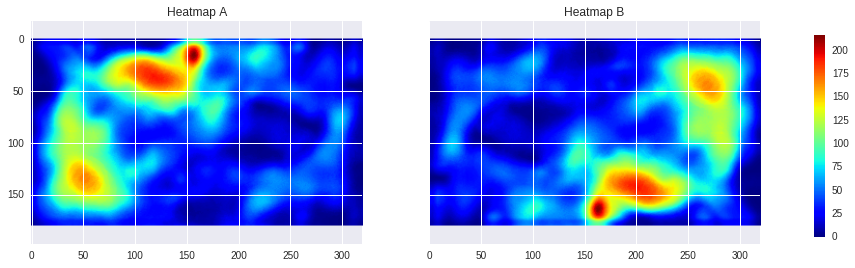

In [4]:
utils.compare_2d(hm1, hm2, title_left='Heatmap A', title_right='Heatmap B')


## Fit B-spline surface

In [5]:
tck1 = heat_maps.fit(hm1)
tck2 = heat_maps.fit(hm2)


## Addition

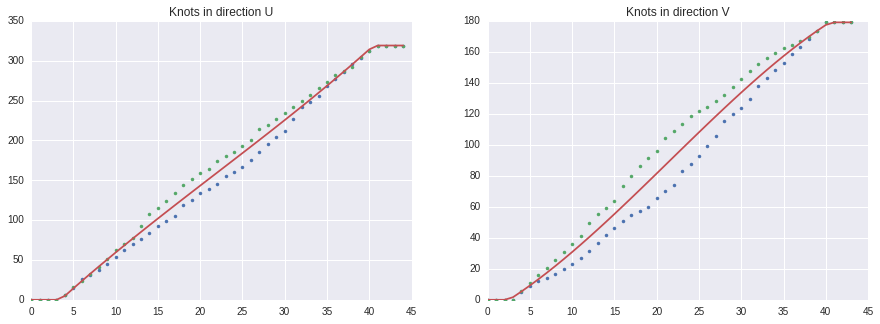

In [6]:
# compute average net of knot vectors in both directions (U & V)
t_average = [
    heat_maps.linearMean(tck1[0], tck2[0], [0.0, 319.0], order=4),
    heat_maps.linearMean(tck1[1], tck2[1], [0.0, 179.0], order=4)
]

f, ax = plt.subplots(1, 2, figsize=(15, 5))

for i in range(2):
    ax[i].plot(tck1[i], 'b.')
    ax[i].plot(tck2[i], 'g.')
    ax[i].plot(t_average[i], 'r-')

ax[0].set_title('Knots in direction U')
ax[1].set_title('Knots in direction V')
plt.show()


In [7]:
# Fit surface above average knot net
tck_hm1_mean = heat_maps.fit(hm1, t_average)
tck_hm2_mean = heat_maps.fit(hm2, t_average)

# add coefficients of both heat maps
tkc_merged = [
    t_average[0],
    t_average[1],
    tck_hm1_mean[2] + tck_hm2_mean[2],
    tck1[3],
    tck2[4]
]


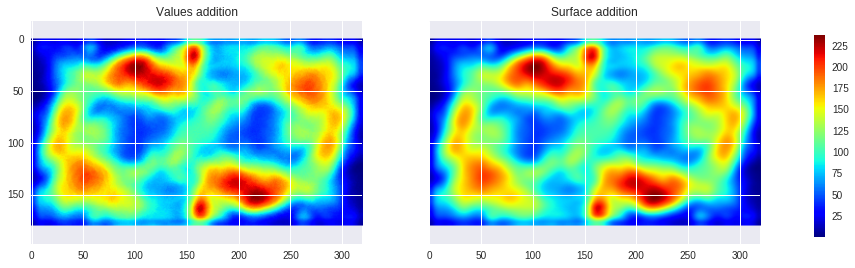

In [8]:
X, Y = np.arange(0.0, hm2.shape[1], 1.0), np.arange(0.0, hm2.shape[0], 1.0)
hm_merged = heat_maps.approx(tkc_merged, X, Y)

utils.compare_2d(hm1 + hm2, hm_merged, title_left='Values addition', title_right='Surface addition')


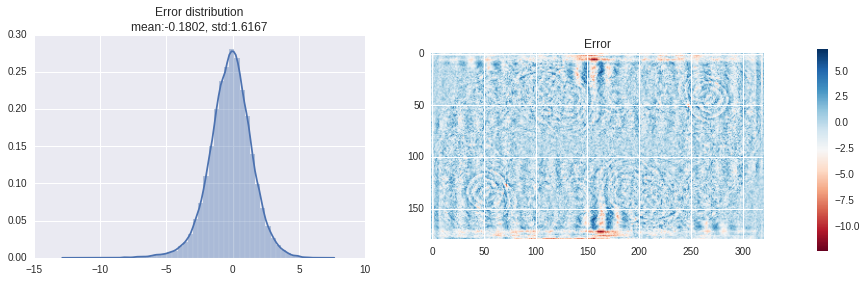

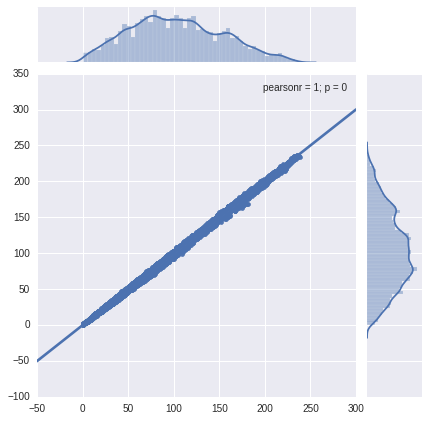

In [9]:
utils.err(hm1+hm2, hm_merged)
